In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import functionality from other notebooks

In [2]:
%run PLOTTING_FUNCTIONS.ipynb

In [3]:
%run COSMETICS_DICTIONARIES.ipynb

In [4]:
%run SOME_PREPROCESSING.ipynb

### Map out occurence of lithologies

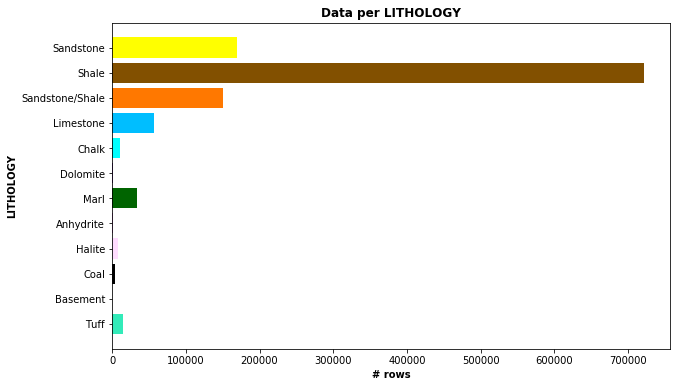

In [5]:
# visualize the occurrence of lithology
lithologies = [v[0] for v in litho_dict.values()]
litho_nums = range(len(litho_dict))

fig, ax = plt.subplots(figsize=(10,6))
for li_num, li_code in zip(litho_nums, litho_dict.keys()):
    ax.barh(li_num, sum(df.FORCE_2020_LITHOFACIES_LITHOLOGY==li_code), color=litho_dict[li_code][1], align='center')

ax.set_yticks(litho_nums)
ax.set_yticklabels(lithologies)
ax.invert_yaxis()
ax.set_ylabel('LITHOLOGY', fontweight='bold')
ax.set_xlabel('# rows', fontweight='bold')
plt.title('Data per LITHOLOGY', fontweight='bold')
plt.show()

### Map out which formations occur and where in the stratigraphy (GROUP)

In [6]:
for gp in df.GROUP[df.GROUP.notna()].unique():
    print(f'{gp:>16}: {sum(df.GROUP==gp):>6d} rows')
print(f'\n{np.nan:>16}: {sum(df.GROUP.isna()):>6d} rows')

    NORDLAND GP.: 111490 rows
   HORDALAND GP.: 293155 rows
    ROGALAND GP.: 131944 rows
    SHETLAND GP.: 234028 rows
CROMER KNOLL GP.:  52320 rows
      VIKING GP.: 131999 rows
    VESTLAND GP.:  26116 rows
   ZECHSTEIN GP.:  12238 rows
       HEGRE GP.:  13913 rows
ROTLIEGENDES GP.:   2792 rows
        TYNE GP.:   1205 rows
   BOKNFJORD GP.:   3125 rows
      DUNLIN GP.: 119085 rows
        BAAT GP.:  35823 rows

             nan:   1278 rows


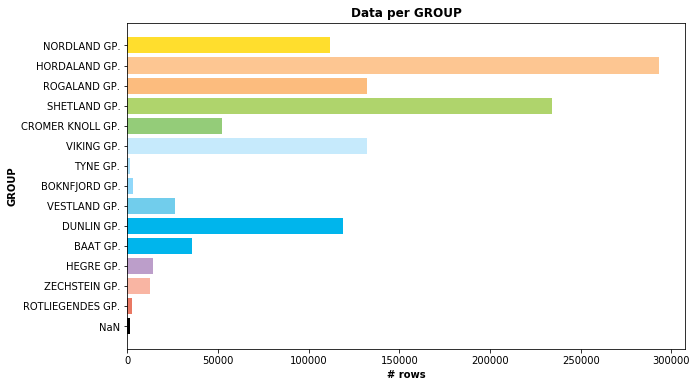

In [7]:
# visualize the same data
groups = [v[0] for v in group_dict.values()]

fig, ax = plt.subplots(figsize=(10,6))
for k in group_dict.keys():
    ax.barh(k, sum(df.GROUP_num==k), color=group_dict[k][1], align='center')

# add bar for nan
ax.barh(k+1, sum(df.GROUP_num.isna()), color='black', align='center')

# add nan to list
group_nums = [k for k in group_dict.keys()]
group_nums.append(k+1)
groups.append('NaN')

ax.set_yticks(group_nums)
ax.set_yticklabels(groups)
ax.invert_yaxis()
ax.set_ylabel('GROUP', fontweight='bold')
ax.set_xlabel('# rows', fontweight='bold')
plt.title('Data per GROUP', fontweight='bold')
plt.show()

In [8]:
# which Formations in each Group
for gp in group_dict.keys():
    print(f'\n{group_dict[gp][0]}{"-"*(32-len(group_dict[gp][0]))}-- {len(df.loc[(df.GROUP_num==gp)]):>6d} rows in total')
    for fm in df.FORMATION.loc[((df.FORMATION.notna())&(df.GROUP_num==gp))].unique():
        print(f'{" "*8}{fm:<24}-- {len(df.loc[((df.FORMATION==fm)&(df.GROUP_num==gp))]):>6d} rows')


NORDLAND GP.---------------------- 111490 rows in total
        Utsira Fm.              --  30406 rows

HORDALAND GP.--------------------- 293155 rows in total
        Utsira Fm.              -- 142230 rows
        Frigg Fm.               --   2585 rows
        Skade Fm.               --  56123 rows
        Grid Fm.                --  37256 rows
        Balder Fm.              --    329 rows

ROGALAND GP.---------------------- 131944 rows in total
        Balder Fm.              --  25485 rows
        Sele Fm.                --  21668 rows
        Lista Fm.               --  59300 rows
        Heimdal Fm.             --   9662 rows
        Vaale Fm.               --   8686 rows
        Skade Fm.               --    204 rows
        Intra Balder Fm. Sst.   --    177 rows
        Hermod Mb.              --    579 rows
        Ty Fm.                  --   6183 rows

SHETLAND GP.---------------------- 234028 rows in total
        Tor Fm.                 --  13525 rows
        Hod Fm.     

In [9]:
for fm in df.FORMATION[df.FORMATION.notna()].unique():
    for gp in df.GROUP[df.FORMATION==fm].unique():
        print(f'{fm:>30}  {gp:>20}  {len(df.GROUP.loc[((df.FORMATION==fm)&(df.GROUP==gp))]):7d}')

                    Utsira Fm.          NORDLAND GP.    30406
                    Utsira Fm.         HORDALAND GP.   142230
                    Balder Fm.          ROGALAND GP.    25485
                    Balder Fm.         HORDALAND GP.      329
                      Sele Fm.          ROGALAND GP.    21668
                      Sele Fm.          SHETLAND GP.     3658
                      Sele Fm.      CROMER KNOLL GP.      125
                     Lista Fm.          ROGALAND GP.    59300
                     Lista Fm.          SHETLAND GP.     8555
                     Lista Fm.      CROMER KNOLL GP.     2186
                     Lista Fm.            VIKING GP.     1039
                   Heimdal Fm.          ROGALAND GP.     9662
                       Tor Fm.          SHETLAND GP.    13525
                       Hod Fm.          SHETLAND GP.    11862
                  Blodoeks Fm.          SHETLAND GP.     2629
                  Blodoeks Fm.      CROMER KNOLL GP.      387
        

In [10]:
for gp in group_dict.keys():
#    print(f'\n{group_dict[gp][0]}{"-"*(33-len(group_dict[gp][0]))}-- {len(df[df.GROUP_num==gp]):>6d} rows in total')
#    for fm in df.FORMATION[df.FORMATION.notna()][df.GROUP_num==gp].unique():
#        print(f'\n{" "*8}{fm}{(28-len(fm))*"."}{len(df[df.FORMATION==fm][df.GROUP_num==gp]):>6d} rows')
#        for li in df.FORCE_2020_LITHOFACIES_LITHOLOGY[df.FORMATION==fm][df.GROUP_num==gp].unique():
#            print(f'{" "*16}{litho_dict[li][0]:<16}    {len(df.FORCE_2020_LITHOFACIES_LITHOLOGY[df.FORCE_2020_LITHOFACIES_LITHOLOGY==li][df.FORMATION==fm][df.GROUP_num==gp]):>6d} {"*"*int(round(len(df.FORCE_2020_LITHOFACIES_LITHOLOGY[df.FORCE_2020_LITHOFACIES_LITHOLOGY==li][df.FORMATION==fm][df.GROUP_num==gp])/2000,0))}')
        
    print(f'\n{group_dict[gp][0]}{"-"*(33-len(group_dict[gp][0]))}-- {len(df.loc[(df.GROUP_num==gp)]):>6d} rows in total')
    for fm in df.loc[((df.FORMATION.notna())&(df.GROUP_num==gp)),'FORMATION'].unique():
        print(f'\n{" "*8}{fm}{(28-len(fm))*"."}{len(df.loc[((df.FORMATION==fm)&(df.GROUP_num==gp))]):>6d} rows')
        for li in df.loc[(df.FORMATION==fm)&(df.GROUP_num==gp),'FORCE_2020_LITHOFACIES_LITHOLOGY'].unique():
            print(f'{" "*16}{litho_dict[li][0]:<16}    \
{len(df.FORCE_2020_LITHOFACIES_LITHOLOGY.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.FORMATION==fm)&(df.GROUP_num==gp))]):>6d} \
{"*"*int(round(len(df.FORCE_2020_LITHOFACIES_LITHOLOGY.loc[((df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)&(df.FORMATION==fm)&(df.GROUP_num==gp))])/2000,0))}')    


NORDLAND GP.----------------------- 111490 rows in total

        Utsira Fm................... 30406 rows
                Shale                 8629 ****
                Sandstone            18677 *********
                Sandstone/Shale       2785 *
                Limestone               93 
                Coal                   222 

HORDALAND GP.---------------------- 293155 rows in total

        Utsira Fm...................142230 rows
                Shale               112311 ********************************************************
                Sandstone             9976 *****
                Sandstone/Shale      17536 *********
                Limestone             1860 *
                Tuff                   279 
                Marl                     7 
                Dolomite               261 

        Frigg Fm....................  2585 rows
                Sandstone             1249 *
                Sandstone/Shale         12 
                Shale              

        Roedby Fm................... 17462 rows
                Marl                  5416 ***
                Shale                 8714 ****
                Sandstone/Shale       1725 *
                Chalk                    5 
                Limestone             1059 *
                Dolomite                 4 
                Sandstone              539 

        Sola Fm.....................  3928 rows
                Marl                   993 
                Shale                 2269 *
                Limestone              392 
                Sandstone/Shale        180 
                Sandstone               94 

        Aasgard Fm.................. 14784 rows
                Limestone              799 
                Shale                 9580 *****
                Marl                  2995 *
                Coal                    13 
                Sandstone/Shale        883 
                Sandstone              437 
                Dolomite                77 

 

                Shale                  520 

        Egersund Fm.................   105 rows
                Shale                  105 

        Skagerrak Fm................   684 rows
                Shale                  186 
                Anhydrite                8 
                Sandstone              395 
                Sandstone/Shale         95 

        Smith Bank Fm...............  1329 rows
                Sandstone               16 
                Sandstone/Shale        244 
                Shale                 1049 *
                Anhydrite               20 

VESTLAND GP.-----------------------  26116 rows in total

        Hugin Fm....................  4656 rows
                Sandstone             3042 **
                Shale                  731 
                Sandstone/Shale        795 
                Limestone               58 
                Coal                    28 
                Dolomite                 2 

        Smith Bank Fm...............  

                Limestone               35 
                Shale                 1046 *

        Fensfjord Fm................   513 rows
                Shale                  199 
                Sandstone/Shale        116 
                Sandstone              179 
                Coal                    19 

        Krossfjord Fm...............   270 rows
                Shale                   33 
                Sandstone              139 
                Sandstone/Shale         98 

        Statfjord Fm................   125 rows
                Shale                  104 
                Sandstone               11 
                Sandstone/Shale         10 

HEGRE GP.--------------------------  13913 rows in total

        Skagerrak Fm................  5696 rows
                Sandstone/Shale       2628 *
                Sandstone             2231 *
                Limestone               65 
                Shale                  734 
                Marl                   

In [11]:
for fm in df.FORMATION[df.FORMATION.notna()].unique():
    print(f'{"-"*(25-len(fm))}{fm:>} ({len(df.WELL[df.FORMATION==fm].unique())} wells)  {df.WELL[df.FORMATION==fm].unique()}\n')

---------------Utsira Fm. (40 wells)  ['15/9-13' '15/9-15' '15/9-17' '16/10-1' '16/10-3' '16/2-11 A' '16/2-16'
 '16/2-6' '16/4-1' '16/7-4' '16/7-5' '16/8-1' '25/2-13 T4' '25/4-5'
 '25/5-1' '25/5-4' '25/6-3' '25/8-7' '25/9-1' '26/4-1' '30/3-3' '30/6-5'
 '31/4-10' '31/4-5' '33/9-1' '33/9-17' '34/10-19' '34/10-21' '34/10-35'
 '34/11-2 S' '34/2-4' '34/7-20' '34/7-21' '34/8-1' '34/8-3' '35/11-1'
 '35/11-11' '35/11-12' '35/11-6' '35/11-7']

---------------Balder Fm. (66 wells)  ['15/9-13' '15/9-15' '15/9-17' '16/10-1' '16/10-3' '16/11-1 ST3'
 '16/2-11 A' '16/2-16' '16/2-6' '16/4-1' '16/7-4' '16/7-5' '16/8-1'
 '17/11-1' '25/11-15' '25/11-19 S' '25/11-5' '25/2-13 T4' '25/2-14'
 '25/2-7' '25/3-1' '25/4-5' '25/5-1' '25/5-4' '25/6-1' '25/6-2' '25/6-3'
 '25/7-2' '25/8-5 S' '25/8-7' '25/9-1' '26/4-1' '29/6-1' '30/3-3' '30/6-5'
 '31/2-1' '31/2-19 S' '31/2-7' '31/2-8' '31/2-9' '31/3-1' '31/3-2'
 '31/3-3' '31/4-10' '31/4-5' '31/5-4 S' '31/6-5' '31/6-8' '33/9-1'
 '33/9-17' '34/10-19' '34/10-21' '34/10-

----------------Tuxen Fm. (2 wells)  ['16/10-5' '17/11-1']

---------------Mandal Fm. (2 wells)  ['16/10-5' '7/1-2 S']

------------------Ula Fm. (2 wells)  ['16/10-5' '7/1-2 S']

----------------Bryne Fm. (2 wells)  ['16/10-5' '7/1-2 S']

------------------Tau Fm. (2 wells)  ['16/11-1 ST3' '17/11-1']

--------------Sandnes Fm. (1 wells)  ['16/11-1 ST3']

---Intra Draupne Fm. Sst. (13 wells)  ['16/2-11 A' '16/2-16' '16/2-6' '16/4-1' '16/5-3' '16/8-1' '25/7-2'
 '33/9-17' '34/7-20' '34/7-21' '34/8-7 R' '35/11-11' '35/9-2']

------------Statfjord Fm. (45 wells)  ['16/2-16' '25/11-15' '25/11-5' '25/2-13 T4' '25/2-14' '25/3-1' '25/4-5'
 '25/5-1' '25/5-4' '25/6-1' '25/8-5 S' '25/9-1' '26/4-1' '29/6-1' '30/3-3'
 '30/3-5 S' '30/6-5' '31/2-1' '31/2-19 S' '31/2-8' '31/3-1' '31/3-3'
 '31/4-5' '32/2-1' '33/5-2' '33/6-3 S' '33/9-1' '34/10-19' '34/10-21'
 '34/10-33' '34/10-35' '34/11-1' '34/11-2 S' '34/2-4' '34/7-13' '34/7-20'
 '34/8-1' '34/8-3' '34/8-7 R' '35/11-1' '35/11-6' '35/11-7' '35/4-1'
 '35

### find out where Formation is missing

In [12]:
for gp in df.GROUP[df.FORMATION.isna()].unique():
    print(gp)

NORDLAND GP.
HORDALAND GP.
nan


### Formation is missing in only in the top two GROUPS + nan GROUP

In [13]:
# The following wells are missing some values for GROUP
df.WELL[df.GROUP.isna()].unique()

array(['30/3-3', '31/3-1', '31/5-4 S', '35/11-6'], dtype=object)

In [14]:
print('Missing data GROUP:')
for w in df.WELL[df.GROUP.isna()].unique():
    print(f'{w:>13}: indices {min(df.loc[(df.GROUP.isna())&(df.WELL==w)].index):>7d}\
- {max(df.loc[(df.GROUP.isna())&(df.WELL==w)].index):>7d}, i.e.\
{max(df.loc[(df.GROUP.isna())&(df.WELL==w)].index)-min(df.loc[(df.GROUP.isna())&(df.WELL==w)].index)+1:>7d} indices \
({len(df.loc[(df.GROUP.isna())&(df.WELL==w)])})')

Missing data GROUP:
       30/3-3: indices  492213-  492258, i.e.     46 indices (46)
       31/3-1: indices  599851-  599898, i.e.     48 indices (48)
     31/5-4 S: indices  662869-  664020, i.e.   1152 indices (1152)
      35/11-6: indices 1021269- 1021300, i.e.     32 indices (32)


In [15]:
for w in df.WELL[df.GROUP.isna()].unique():
    print(f'{min(df[df.WELL==w].index):7d}-{max(df[df.WELL==w].index):7d}')

 492213- 513375
 599851- 613086
 662869- 674182
1021269-1044812


In [16]:
### get first GROUP value after gap:
for w in df.WELL[df.GROUP.isna()].unique():
    print(f'{w:>12}: first GROUP value after NaN gap: {df.loc[max(df.loc[((df.GROUP.isna())&(df.WELL==w))].index)+1,"GROUP"]}')

      30/3-3: first GROUP value after NaN gap: NORDLAND GP.
      31/3-1: first GROUP value after NaN gap: NORDLAND GP.
    31/5-4 S: first GROUP value after NaN gap: NORDLAND GP.
     35/11-6: first GROUP value after NaN gap: NORDLAND GP.


### In which Groups do we have missing Formations?

In [17]:
df.GROUP[df.FORMATION.isna()].unique()

array(['NORDLAND GP.', 'HORDALAND GP.', nan], dtype=object)

In [18]:
for g in df.GROUP[df.FORMATION.isna()].unique():
    print(f'{g:>20} {len(df.loc[(df.FORMATION.isna()) & (df.GROUP==g)]):7d}')

        NORDLAND GP.   81084
       HORDALAND GP.   54632
                 nan       0


### In which wells are we missing some Formations?

In [19]:
# The following wells are missing some values for FORMATION
df.WELL[df.FORMATION.isna()].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/10-1', '16/10-3',
       '16/11-1 ST3', '16/2-11 A', '16/2-16', '16/2-6', '16/4-1',
       '16/7-5', '17/11-1', '25/2-7', '25/3-1', '25/5-1', '25/6-3',
       '25/9-1', '26/4-1', '30/3-3', '30/6-5', '31/2-1', '31/2-19 S',
       '31/2-7', '31/2-8', '31/2-9', '31/3-1', '31/3-2', '31/3-3',
       '31/5-4 S', '31/6-5', '31/6-8', '33/9-1', '33/9-17', '34/10-19',
       '34/10-21', '34/2-4', '34/8-1', '35/11-12', '35/11-6', '35/4-1',
       '7/1-1'], dtype=object)

### Which Formations are missing in each well?

In [20]:
for w in df.WELL[df.FORMATION.isna()].unique():
    print(f'{w:>16} missing Fm in {df.GROUP[df.FORMATION.isna()][df.WELL==w].unique()}')

         15/9-13 missing Fm in ['NORDLAND GP.']
         15/9-15 missing Fm in ['NORDLAND GP.']
         15/9-17 missing Fm in ['NORDLAND GP.']
         16/10-1 missing Fm in ['NORDLAND GP.']
         16/10-3 missing Fm in ['NORDLAND GP.']
     16/11-1 ST3 missing Fm in ['NORDLAND GP.' 'HORDALAND GP.']
       16/2-11 A missing Fm in ['NORDLAND GP.']
         16/2-16 missing Fm in ['NORDLAND GP.']
          16/2-6 missing Fm in ['NORDLAND GP.']
          16/4-1 missing Fm in ['NORDLAND GP.']
          16/7-5 missing Fm in ['NORDLAND GP.']
         17/11-1 missing Fm in ['NORDLAND GP.' 'HORDALAND GP.']
          25/2-7 missing Fm in ['NORDLAND GP.' 'HORDALAND GP.']
          25/3-1 missing Fm in ['NORDLAND GP.' 'HORDALAND GP.']
          25/5-1 missing Fm in ['NORDLAND GP.']
          25/6-3 missing Fm in ['NORDLAND GP.']
          25/9-1 missing Fm in ['NORDLAND GP.']
          26/4-1 missing Fm in ['NORDLAND GP.']
          30/3-3 missing Fm in [nan 'NORDLAND GP.']
          30/6-5 mis